In [20]:
import re

In [21]:
l = "color or colour"
pattern = re.compile("colou?r")
pattern.findall(l)

['color', 'colour']

In [22]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [23]:
def get_city_info(city_coodination):
    city_location = {}
    for line in city_coodination.split("\n"):
        if line.startswith("//"):continue
        if line.strip() == "":continue
        
        city = re.findall("name:'(\w+)'",line)[0]
        x_y = re.findall("Coord:\[(\d+.\d+),\s(\d+.\d+)\]",line)[0]
        x_y = tuple(map(float,x_y))
        city_location[city] = x_y
    
    return city_location

In [24]:
city_location_info = get_city_info(coordination_source)

In [25]:
city_location_info

{'上海': (121.48, 31.22),
 '乌鲁木齐': (87.68, 43.77),
 '兰州': (103.73, 36.03),
 '北京': (116.46, 39.92),
 '南京': (118.78, 32.04),
 '南宁': (108.33, 22.84),
 '南昌': (115.89, 28.68),
 '合肥': (117.27, 31.86),
 '呼和浩特': (111.65, 40.82),
 '哈尔滨': (126.63, 45.75),
 '嘉峪关': (98.17, 39.47),
 '天津': (117.2, 39.13),
 '太原': (112.53, 37.87),
 '广州': (113.23, 23.16),
 '成都': (104.06, 30.67),
 '拉萨': (102.73, 25.04),
 '杭州': (120.19, 30.26),
 '武汉': (114.31, 30.52),
 '沈阳': (123.38, 41.8),
 '济南': (117.0, 36.65),
 '澳门': (113.54, 22.19),
 '石家庄': (114.48, 38.03),
 '福州': (119.3, 26.08),
 '西宁': (101.74, 36.56),
 '西安': (108.95, 34.27),
 '贵阳': (106.71, 26.57),
 '郑州': (113.65, 34.76),
 '重庆': (106.54, 29.59),
 '银川': (106.27, 38.47),
 '长春': (125.35, 43.88),
 '长沙': (113.0, 28.21),
 '香港': (114.17, 22.28)}

#以下函数为通过经纬度计算两个城市的距离，从别处直接拷贝过来的函数，因为地球是球形，通过换算经纬度得到两个城市的距离

In [26]:
import math

def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [27]:
def get_city_distance(city1,city2):
    return geo_distance(city_location_info[city1],city_location_info[city2])

In [28]:
get_city_distance("上海","兰州")

1982.8114694462738

画地图 draw the map

In [29]:
import networkx as nx
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [30]:
city_location_info.keys()

dict_keys(['兰州', '嘉峪关', '西宁', '成都', '石家庄', '拉萨', '贵阳', '武汉', '郑州', '济南', '南京', '合肥', '杭州', '南昌', '福州', '广州', '长沙', '沈阳', '长春', '哈尔滨', '太原', '西安', '北京', '上海', '重庆', '天津', '呼和浩特', '南宁', '银川', '乌鲁木齐', '香港', '澳门'])

In [31]:
city_graph=nx.Graph()
city_graph.add_nodes_from(list(city_location_info.keys()))

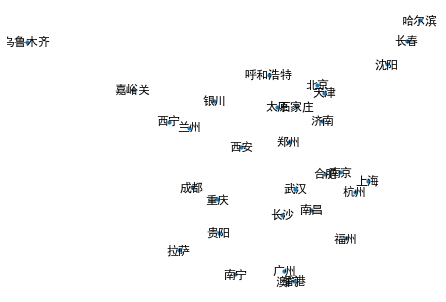

In [32]:
nx.draw(city_graph,city_location_info,with_labels=True,node_size=10)

In [33]:
threshold=700

In [34]:
from collections import defaultdict

In [35]:
def build_connection(city_loc_info):
    cities_connection=defaultdict(list)
    cities=list(city_location_info.keys())
    for city1 in cities:
        for city2 in cities:
            if city1 == city2:continue
            if get_city_distance(city1,city2) < threshold:
                cities_connection[city1].append(city2)
    return cities_connection

In [36]:
cities_connection = build_connection(city_location_info)

In [37]:
cities_connection

defaultdict(list,
            {'上海': ['济南', '南京', '合肥', '杭州', '南昌', '福州', '沈阳', '天津'],
             '兰州': ['嘉峪关', '西宁', '成都', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川'],
             '北京': ['石家庄',
              '武汉',
              '郑州',
              '济南',
              '南京',
              '合肥',
              '杭州',
              '南昌',
              '长沙',
              '太原',
              '天津',
              '呼和浩特'],
             '南京': ['石家庄',
              '武汉',
              '郑州',
              '济南',
              '合肥',
              '杭州',
              '南昌',
              '福州',
              '长沙',
              '北京',
              '上海',
              '天津'],
             '南宁': ['兰州',
              '成都',
              '拉萨',
              '贵阳',
              '广州',
              '长沙',
              '西安',
              '重庆',
              '银川',
              '香港',
              '澳门'],
             '南昌': ['石家庄',
              '武汉',
              '郑州',
              '济南',
              '南京',
     

先建立一张图

In [38]:
cities_connection_graph = nx.Graph(cities_connection) 

再把图给画出来

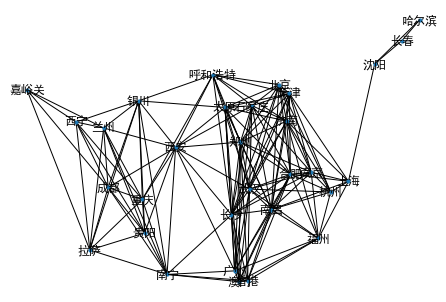

In [39]:
nx.draw(cities_connection_graph,city_location_info,with_labels=True,node_size=10) 

BFS

In [40]:
def bfs(graph,startpoint,endpoint):
    pathes = [[startpoint]]
    visited = set()
    
    while pathes:
        path = pathes.pop(0)
        froniter = path[-1]
        if froniter in visited:continue
        successors = graph[froniter]
        
        for city in successors:
            if city in path:continue
            new_path = path + [city]
            pathes.append(new_path)
            
            if city == endpoint:
                return new_path
        visited.add(froniter)

In [41]:
bfs(cities_connection,"沈阳","香港")

['沈阳', '上海', '合肥', '香港']

In [42]:
bfs(cities_connection,"香港","拉萨")

['香港', '南宁', '拉萨']

DFS

In [43]:
def dfs(graph,startpoint,endpoint):
    pathes = [[startpoint]]
    visited = set()
    
    while pathes:
        path = pathes.pop(0)
        froniter = path[-1]
        if froniter in visited:continue
        successors = graph[froniter]
        
        for city in successors:
            if city in path:continue
            new_path = path + [city]
            pathes = [new_path] + pathes
            
            if city == endpoint:
                return new_path
        visited.add(froniter)

In [44]:
dfs(cities_connection,"香港","拉萨")

['香港', '澳门', '南宁', '拉萨']

In [45]:
dfs(cities_connection,"拉萨","西安")

['拉萨', '银川', '西安']

In [46]:
dfs(cities_connection,"沈阳","香港")

['沈阳', '上海', '天津', '呼和浩特', '银川', '南宁', '香港']

下面的代码将按照最短的里程数计算

In [47]:
def bfs_up(graph,startpoint,endpoint,search_strategy):
    pathes = [[startpoint]]
   
    while pathes:
        path = pathes.pop(0)
        froniter = path[-1]
        
        successors = graph[froniter]
        
        for city in successors:
            if city in path:continue
            new_path = path + [city]
            pathes.append(new_path)
            
        pathes = search_strategy(pathes)
        if pathes and pathes[0][-1]==endpoint:
            return pathes[0]

In [48]:
for i,j in enumerate([1,3,4,7,8,9,9]):
    print(i,j)

0 1
1 3
2 4
3 7
4 8
5 9
6 9


In [49]:
for i,_ in enumerate([1,3,5,7,9]):
    print(i)

0
1
2
3
4


In [50]:
def sort_by_distance(pathes):
    def get_distance_of_path(path):
        distance = 0
        for i,_ in enumerate(path[:-1]):
            distance += get_city_distance(path[i],path[i+1])
        return distance
    return sorted(pathes,key = get_distance_of_path)

In [51]:
bfs_up(cities_connection,"沈阳","香港",search_strategy=sort_by_distance)

['沈阳', '上海', '福州', '香港']

In [52]:
def get_distance_of_path(path):
    distance = 0
    for i,_ in enumerate(path[:-1]):
        distance += get_city_distance(path[i],path[i+1])
    return distance

In [53]:
get_distance_of_path(["北京","济南","上海"])

752.66259009181

In [54]:
get_distance_of_path(["北京","天津","上海"])

732.5085345714293

In [55]:
bfs_up(cities_connection,"北京","上海",search_strategy=sort_by_distance)

['北京', '天津', '上海']

In [56]:
bfs(cities_connection,"北京","上海")

['北京', '济南', '上海']

search_strategy可以是距离，也可以是城市之间交通工具的时间或者是车/机票的价钱等

Machine Learning 波士顿房价

In [57]:
from sklearn.datasets import load_boston
import random

In [58]:
dataset = load_boston()

In [59]:
dataset

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [60]:
x,y=dataset['data'],dataset['target']

In [61]:
x.shape

(506, 13)

In [62]:
y.shape

(506,)

In [63]:
x[1].shape
x[1]

array([2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
       6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
       1.7800e+01, 3.9690e+02, 9.1400e+00])

In [64]:
dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [65]:
dataset['DESCR']

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

取第五个特征RM，从0数起，到5

In [66]:
X_rm=x[:,5]

In [67]:
X_rm.shape

(506,)

横轴为房间数，纵轴为房价

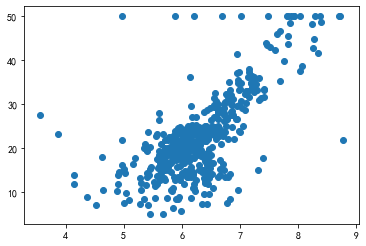

In [68]:
plt.scatter(X_rm,y)

梯度下降
定义目标函数为线性函数

$$y=k*rm+b$$

In [69]:
def price(rm,k,b):
    return k*rm+b

定义square loss

$$ loss = \frac{1}{n}\sum{(y_i-\hat{y_i})}^2$$

$$ loss = \frac{1}{n}\sum{(y_i-(kx_i+b_i)}^2$$

定义loss函数
y为真实值
y_hat为预测值（通过price函数预测出的y值）
len(list(y))为样本数量

In [70]:
def loss(y,y_hat):
    return sum((y_i-y_hat_i)**2 for y_i,y_hat_i in zip(list(y),list(y_hat)))/len(list(y))

梯度下降需要求梯度值

$$\frac{\partial{loss}}{\partial{k}} = -\frac{2}{n}\sum(y_i-\hat{y_i})x_i$$

$$\frac{\partial{loss}}{\partial{b}} = -\frac{2}{n}\sum(y_i-\hat{y_i})$$

定义梯度函数

In [75]:
def partial_derivative_k(x,y,y_hat):
    n = len(y)
    gradient = 0
    for x_i,y_i,y_hat_i in zip(list(x),list(y),list(y_hat)):
        gradient += (y_i - y_hat_i) * x_i
    return -2/n * gradient

In [76]:
def partial_derivative_b(y,y_hat):
    n = len(y)
    gradient = 0
    for y_i,y_hat_i in zip(list(y),list(y_hat)):
        gradient += y_i - y_hat_i
    return -2/n * gradient

初始化参数

In [81]:
k = random.random() * 20 - 10 #-10 10  #设置小一点，以防振荡
b = random.random() * 20 - 10 #-10 10
learning_rate = 1e-3
iteration_num = 200 #迭代次数，走200步
losses = [] #每走一步，losses的值存储
for i in range(iteration_num):
    price_use_current_parameters = [price(r,k,b) for r in X_rm]  #|hat(y)
    current_loss = loss(y,price_use_current_parameters)
    losses.append(current_loss)
    print("Iteration is {}, the Loss is {}, parameter k is {} and b is {}".format(i,current_loss,k,b))
    
    k_gradient = partial_derivative_k(X_rm,y,price_use_current_parameters)
    b_gradient = partial_derivative_b(y,price_use_current_parameters)
    
    k = k + (-1 * k_gradient) * learning_rate
    b = b + (-1 * b_gradient) * learning_rate
    
best_k = k
best_b = b

Iteration is 0, the Loss is 1473.9108173576465, parameter k is 8.759773782903022 and b is 5.299510359881319
Iteration is 1, the Loss is 1252.0302969486775, parameter k is 8.28475796842149 and b is 5.223873000726868
Iteration is 2, the Loss is 1065.0276208390187, parameter k is 7.848683983426323 and b is 5.154357517735178
Iteration is 3, the Loss is 907.4202483629188, parameter k is 7.448360365491022 and b is 5.090462196832533
Iteration is 4, the Loss is 774.5874539350278, parameter k is 7.080857207221966 and b is 5.031726441722383
Iteration is 5, the Loss is 662.6348560565518, parameter k is 6.743484720619795 and b is 4.97772740409429
Iteration is 6, the Loss is 568.2802413655323, parameter k is 6.433773558190034 and b is 4.928076890002746
Iteration is 7, the Loss is 488.7573363069195, parameter k is 6.149456746829252 and b is 4.88241851978249
Iteration is 8, the Loss is 421.73470518854106, parameter k is 5.888453102312395 and b is 4.840425120721836
Iteration is 9, the Loss is 365.2473

结果与初始化参数、学习率、迭代次数有很大关系

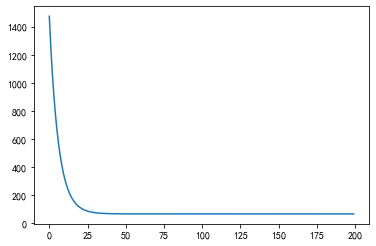

In [82]:
plt.plot(list(range(iteration_num)),losses)

纵轴为loss

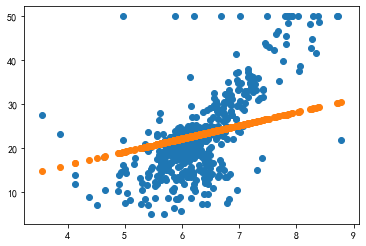

In [84]:
price_use_best_parameters = [price(r,best_k,best_b) for r in X_rm]
plt.scatter(X_rm,y)
plt.scatter(X_rm,price_use_best_parameters)